In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
plt.rc('font', family='Malgun Gothic')

In [3]:
data = pd.read_csv('../../data/clustering_data/gg_data.csv')

In [4]:
#data = data.drop(['Unnamed: 0'],axis=1)

In [5]:
# 할인율_한시의 결측치를 할인율_상시로 대체
data['할인율_상시'] = data['할인율_상시'].fillna(0)
data['구매한도_월'] = data['구매한도_월'].fillna(0)
data['구매한도_연'] = data['구매한도_연'].fillna(0)
data['할인율_한시'] = np.where(pd.notnull(data['할인율_한시']) == True, data['할인율_한시'], data['할인율_상시'])

In [7]:
# 종사자 제거
data = data.drop(['제조업종사자비율','도소매업종사자비율', '운수업종사자비율'], axis=1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   시군           31 non-null     object 
 1   총인구수         31 non-null     float64
 2   할인율_상시       31 non-null     float64
 3   할인율_한시       31 non-null     float64
 4   구매한도_월       31 non-null     int64  
 5   구매한도_연       31 non-null     int64  
 6   지역화폐사용액(천원)  31 non-null     float64
 7   경제활동참가율      31 non-null     float64
 8   서비스업사업체비율    31 non-null     float64
 9   제조업사업체비율     31 non-null     float64
 10  도소매업사업체비율    31 non-null     float64
 11  운수업사업체비율     31 non-null     float64
 12  농업가구비율       31 non-null     float64
 13  합계출산율        31 non-null     float64
 14  도시지역면적       31 non-null     int64  
 15  주택           31 non-null     int64  
 16  전체대비주택비율     31 non-null     float64
 17  면적대비주택비율     31 non-null     float64
 18  미성년비율        31 non-null     float64
 19  청년비율      

### 1) Normalization

In [9]:
x = data.drop(['시군'], axis=1)
y = data['시군'].values

In [10]:
# x객체에 x를 표준화한 데이터를 저장
trans_x = StandardScaler().fit_transform(x.values)

In [11]:
x_df = pd.DataFrame(trans_x, columns=x.columns)

### 2) PCA

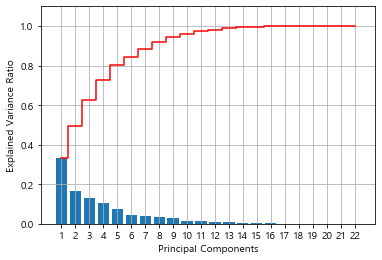

In [12]:
pca = PCA(n_components=x_df.shape[1])
pca.fit(x_df)
explained_variance_ratio = pca.explained_variance_ratio_

def explained_variance_ratio_plot(explained_variance_ratio):
    x_axis = range(1, len(explained_variance_ratio)+1)
    plt.bar(x_axis, explained_variance_ratio,
            align = 'center', label = 'Individual Explained Variance Ratio')
    plt.step(x_axis, np.cumsum(explained_variance_ratio),
             where = 'mid', color='red', label='Cumulative Explained Variance Ratio')
    plt.ylim(0, 1.1)
    plt.xticks(x_axis)
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.grid()
    plt.show()

explained_variance_ratio_plot(explained_variance_ratio)

In [13]:
df_v = pd.DataFrame(np.cumsum(explained_variance_ratio[:14]), 
                    index=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14'], 
                    columns=['Cum_V_ration'])

df_v

##주성분 10개 원래 데이터의 약 96% 설명

,Cum_V_ration
PC1,0.331505
PC2,0.495384
PC3,0.625951
PC4,0.729416
PC5,0.802659
PC6,0.846144
PC7,0.884579
PC8,0.917473
PC9,0.944833
PC10,0.961156


In [17]:
printcipalComponents = pca.fit_transform(x_df)

In [18]:
pca_data = pd.DataFrame(printcipalComponents[:,:10], 
                        columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']
                        , index = y)

In [19]:
pca_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
수원시,-3.739800,-2.216901,0.228826,2.008910,1.232878,0.633103,-0.417432,0.767870,-0.747894,-0.321744
성남시,-2.931943,-1.653029,5.397426,1.010263,-1.193936,1.533010,1.086859,-0.884443,0.806589,0.568598
의정부시,-0.154365,-2.149534,-0.040522,-0.456895,-0.040303,-0.352485,0.102765,0.829157,-0.161054,-0.051950
안양시,-0.679688,-1.815697,0.171007,0.162304,1.483352,0.668217,-0.853355,-0.565580,-0.159490,0.681116
부천시,-2.087962,-1.693943,1.658417,0.800997,3.373954,-0.550179,-0.303390,-0.554368,-1.375762,-0.409701
광명시,-0.309774,-1.631669,-0.662008,-1.435454,0.681707,0.064834,0.169064,-0.012100,-0.721814,-0.654288
평택시,-1.119967,0.452023,-0.177069,0.250270,-0.312040,1.170208,-0.442597,1.001344,0.568671,0.013894
동두천시,2.212671,-1.538111,0.313996,-1.573656,-0.915380,-1.340590,0.182770,1.090462,-0.178793,0.401510
안산시,-2.002331,-0.115939,1.663920,-0.568017,1.270221,-0.610011,0.284344,0.455343,2.479824,0.384274
고양시,-2.524950,-2.256467,0.660462,1.888408,-0.423153,-0.926680,-0.417075,-0.118563,0.322636,-0.323493


### 3) K-Means Clustering

1. elbow

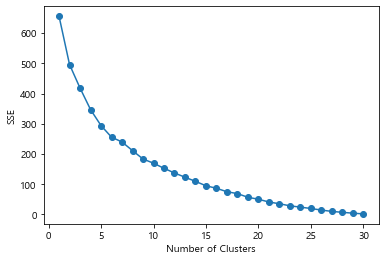

In [20]:
def elbow(x, n):
    sse = []
    for i in range(1, n):
        km = KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(x)
        sse.append(km.inertia_)
    plt.plot(range(1, n), sse, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    
elbow(pca_data, 31)

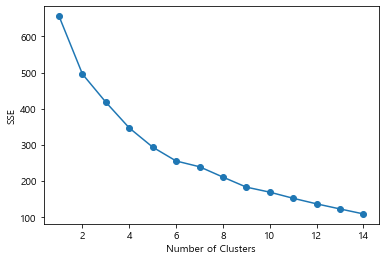

In [21]:
elbow(pca_data, 15)

2. silhouette

Range of SC Interpretation  
0.71-1.0 A strong structure has been found  
0.51-0.70 A reasonable structure has been found  
0.26-0.50 The structure is weak and could be artificial  
< 0.25 No substantial structure has been found  

In [22]:
kmeans_kwargs = { "init": "random", "n_init": 10, "max_iter": 300, "random_state": 0}

# A list holds the silhouette coefficients for each k
silhouette_coefficients = []


# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(pca_data)
    score = sklearn.metrics.silhouette_score(pca_data, kmeans.labels_)
    silhouette_coefficients.append(score)

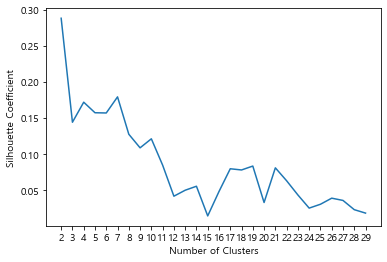

In [23]:
plt.plot(range(2, 30), silhouette_coefficients)
plt.xticks(range(2, 30))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

3. gap stastics  
https://anaconda.org/milesgranger/gap-statistic/notebook

In [24]:
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
            # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal   
        

In [25]:
k, gapdf = optimalK(pca_data, nrefs=5, maxClusters=15)
print ('Optimal k is: ', k)

Optimal k is:  11


C:\Users\smk\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smk\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


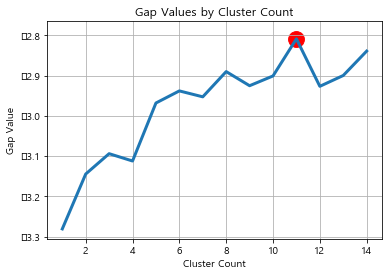

In [26]:
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()


In [27]:
kmeans = KMeans(n_clusters=7).fit(pca_data)

In [28]:
pca_data['cluster_id'] = kmeans.labels_

In [29]:
clust_data = pca_data

In [30]:
clust_data.sort_values(by='cluster_id')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,cluster_id
군포시,0.005335,0.195725,-1.056381,-0.671131,1.857589,-0.062487,0.385243,-0.160594,-0.736319,1.108629,0
포천시,3.073098,2.170512,1.354457,-0.454322,2.149535,-1.818962,-0.174062,-0.848019,0.723557,-1.153241,0
양주시,0.713693,1.661352,-1.774590,-0.167424,-0.468309,-1.397941,0.146767,-0.658566,-0.081993,0.616933,0
안성시,1.605706,1.857657,-0.994829,0.470347,0.184500,0.281274,0.046329,-0.052973,0.735268,-0.904642,0
이천시,0.673617,0.883032,-0.792936,-0.850263,0.194997,1.072033,0.293700,0.728921,0.607281,-1.033934,0
연천군,6.017883,1.808117,-0.431338,1.876003,0.687759,1.580656,-1.311268,0.196191,-0.073158,1.584254,1
여주시,3.978076,0.407336,0.443785,0.085899,0.159025,0.090682,-0.336148,0.255384,-0.588816,-0.030325,1
가평군,5.810024,-0.154415,1.878440,1.539138,-0.710769,-0.380590,-1.296003,1.261522,0.569737,-0.497856,1
양평군,5.703010,-0.373168,0.894440,2.526955,-0.949316,0.730537,2.645282,-0.664843,-0.887382,-0.540537,1
성남시,-2.931943,-1.653029,5.397426,1.010263,-1.193936,1.533010,1.086859,-0.884443,0.806589,0.568598,2


In [31]:
data['cluster_id'] = kmeans.labels_

In [32]:
data.to_csv('../../data/clustering_data/cluster_data.csv', index=False)

### 4) Visualization

In [33]:
data

,시군,총인구수,할인율_상시,할인율_한시,구매한도_월,구매한도_연,지역화폐사용액(천원),경제활동참가율,서비스업사업체비율,제조업사업체비율,...,도시지역면적,주택,전체대비주택비율,면적대비주택비율,미성년비율,청년비율,중년비율,장년비율,노년비율,cluster_id
0,수원시,1194465.0,0.06,0.10,50,400,22696236.0,62.6,0.759848,0.052995,...,121182030,354566,0.086990,0.002926,0.191714,0.217396,0.260891,0.226560,0.103439,3
1,성남시,942724.0,0.06,0.00,10,50,86074070.0,62.0,0.767902,0.063562,...,141820898,251281,0.061650,0.001772,0.172351,0.198688,0.253128,0.241703,0.134130,2
2,의정부시,451868.0,0.06,0.10,40,400,9062650.0,59.4,0.758880,0.049615,...,81598380,142635,0.034994,0.001748,0.177133,0.187298,0.244418,0.248429,0.142722,5
3,안양시,567044.0,0.06,0.10,30,600,20391808.0,62.1,0.733692,0.086717,...,58480054,171744,0.042136,0.002937,0.173936,0.200810,0.241278,0.258014,0.125962,5
4,부천시,829996.0,0.06,0.10,40,400,31543254.0,63.0,0.660901,0.173820,...,53450000,255150,0.062599,0.004774,0.165990,0.204109,0.242981,0.263626,0.123295,3
5,광명시,316552.0,0.06,0.10,40,480,6372380.0,61.8,0.710427,0.092470,...,38506473,99721,0.024466,0.002590,0.186101,0.182426,0.259265,0.242419,0.129789,5
6,평택시,513027.0,0.06,0.10,30,360,10543560.0,63.8,0.722968,0.105638,...,151090527,171851,0.042162,0.001137,0.198596,0.193366,0.265432,0.224345,0.118261,6
7,동두천시,94768.0,0.06,0.10,30,360,2106819.0,56.2,0.724726,0.077040,...,33565811,33510,0.008221,0.000998,0.171149,0.161159,0.226589,0.252754,0.188349,5
8,안산시,650918.0,0.06,0.10,0,400,27036345.0,63.4,0.635912,0.173842,...,151472339,193891,0.047569,0.001280,0.176492,0.215499,0.246811,0.261677,0.099521,6
9,고양시,1066351.0,0.06,0.10,40,400,28739326.0,59.7,0.734979,0.084586,...,194127720,313254,0.076854,0.001614,0.182635,0.184406,0.253629,0.251385,0.127944,3


In [34]:
data_dict = {}
for i in range(7):
    dict_list = []
    for j in data.index:
        if data['cluster_id'][j] == i:
            dict_list.append(data['시군'][j])
    data_dict[i] = dict_list    

gg_cluster = pd.DataFrame.from_dict(data_dict, orient = 'index').fillna(' ')
gg_cluster

,0,1,2,3,4,5,6,7
0,군포시,이천시,안성시,양주시,포천시,,,
1,여주시,연천군,가평군,양평군,,,,
2,성남시,,,,,,,
3,수원시,부천시,고양시,남양주시,용인시,,,
4,김포시,,,,,,,
5,의정부시,안양시,광명시,동두천시,과천시,구리시,의왕시,하남시
6,평택시,안산시,오산시,시흥시,파주시,화성시,광주시,


In [35]:
data_mean = data.set_index('시군').groupby('cluster_id').mean()

In [36]:
data_mean.columns

Index(['총인구수', '할인율_상시', '할인율_한시', '구매한도_월', '구매한도_연', '지역화폐사용액(천원)',
       '경제활동참가율', '서비스업사업체비율', '제조업사업체비율', '도소매업사업체비율', '운수업사업체비율', '농업가구비율',
       '합계출산율', '도시지역면적', '주택', '전체대비주택비율', '면적대비주택비율', '미성년비율', '청년비율',
       '중년비율', '장년비율', '노년비율'],
      dtype='object')

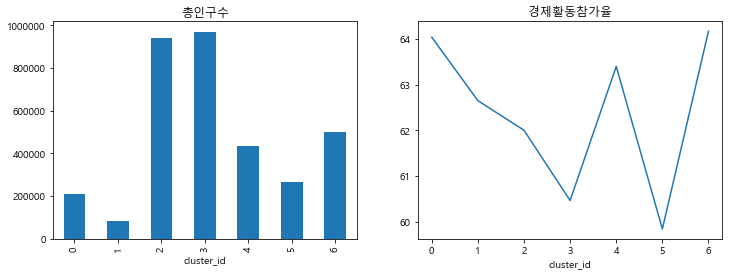

In [39]:
# 인구 ['총인구수','미성년비율','청년비율', '중년비율','장년비율','노년비율']
fig, axes = plt.subplots(1,2,figsize=(12,4))
data_mean['총인구수'].plot(kind='bar',ax = axes[0], legend = False, title = '총인구수')
data_mean['경제활동참가율'].plot(ax = axes[1], legend = False, title = '경제활동참가율')

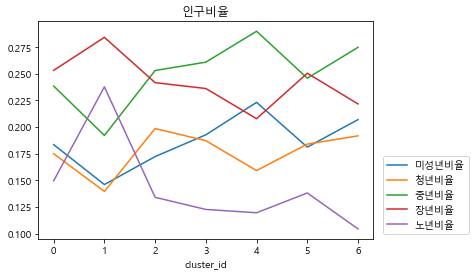

In [42]:
data_mean[['미성년비율','청년비율', '중년비율','장년비율','노년비율']].plot(title = '인구비율')
plt.legend(loc='lower right', bbox_to_anchor = (1.3, 0))

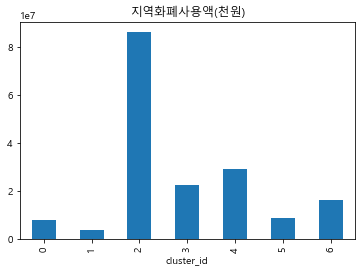

In [45]:
# 지역화폐 ['할인율_상시', '할인율_한시', '구매한도_월', '구매한도_연', '지역화폐사용액(천원)',]
data_mean['지역화폐사용액(천원)'].plot(kind='bar',legend = False, title = '지역화폐사용액(천원)')

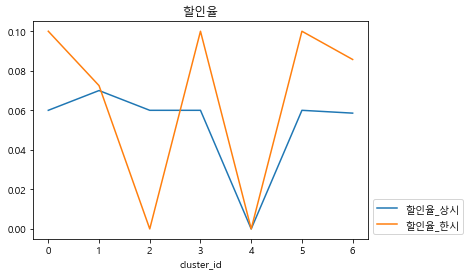

In [44]:
data_mean[['할인율_상시', '할인율_한시']].plot(title = '할인율')
plt.legend(loc='lower right', bbox_to_anchor = (1.3, 0))

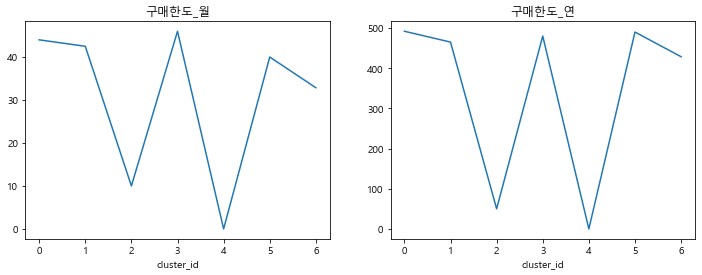

In [46]:
fig, axes = plt.subplots(1,2,figsize=(12,4))
data_mean['구매한도_월'].plot(ax = axes[0], title = '구매한도_월')
data_mean['구매한도_연'].plot(ax = axes[1], title = '구매한도_연')

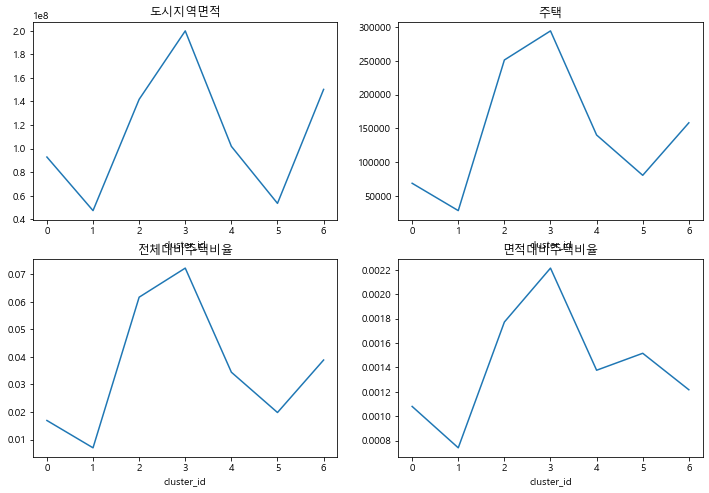

In [48]:
# 면적 및 주택 ['도시지역면적', '주택', '전체대비주택비율', '면적대비주택비율']
fig, axes = plt.subplots(2,2,figsize=(12,8))
data_mean['도시지역면적'].plot(ax = axes[0, 0], title = '도시지역면적')
data_mean['주택'].plot(ax = axes[0, 1], title = '주택')
data_mean['전체대비주택비율'].plot(ax = axes[1, 0], title = '전체대비주택비율')
data_mean['면적대비주택비율'].plot(ax = axes[1, 1], title = '면적대비주택비율')

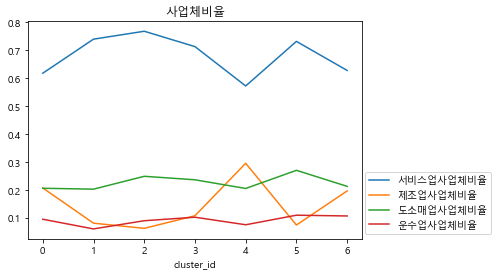

In [51]:
# 사업체비율 ['서비스업사업체비율', '제조업사업체비율', '도소매업사업체비율', '운수업사업체비율']
data_mean[['서비스업사업체비율', '제조업사업체비율', '도소매업사업체비율', '운수업사업체비율']].plot(title = '사업체비율')
plt.legend(loc='lower right', bbox_to_anchor = (1.4, 0))